In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset importing

In [213]:
df = pd.read_csv('/content/crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [214]:
df['Index'] = range(1, len(df) + 1)

In [215]:
df.shape

(19689, 11)

In [216]:
df.dropna(inplace=True)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
 10  Index            19689 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.7+ MB


### Statistical Description of Data

In [218]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Index
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009,9845.000000
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193,5683.869061
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000,1.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000,4923.000000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000,9845.000000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889,14767.000000
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000,19689.000000


#### Checking the Datatypes of the columns

In [219]:
df.dtypes

,0
Crop,object
Crop_Year,int64
Season,object
State,object
Area,float64
Production,int64
Annual_Rainfall,float64
Fertilizer,float64
Pesticide,float64
Yield,float64


#### Checking the Null values

In [220]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


### EDA Processing

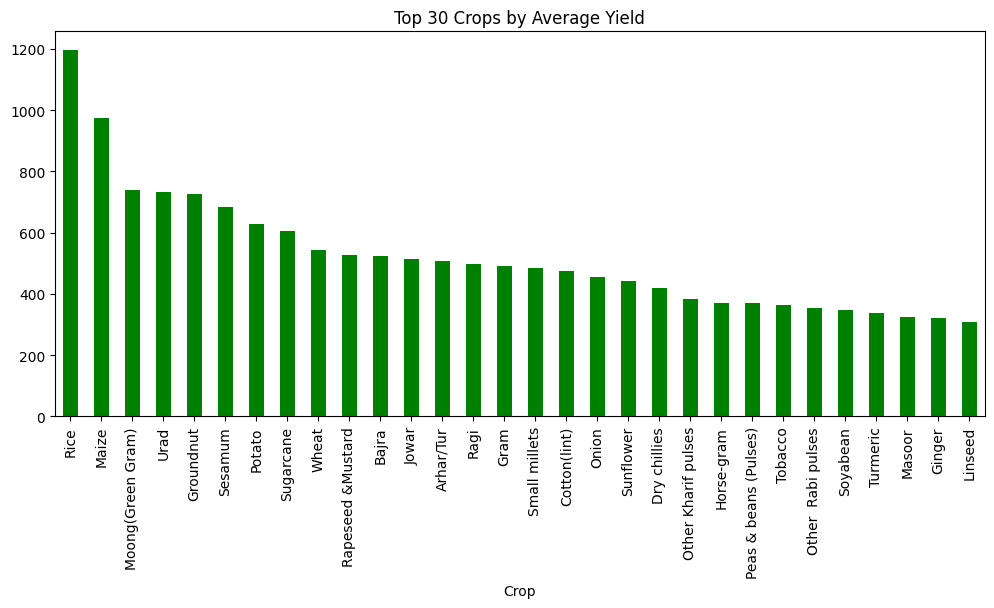

In [221]:
plt.figure(figsize=(12,5))
df['Crop'].value_counts().head(30).plot.bar(color='g')
plt.title("Top 30 Crops by Average Yield")
plt.show()

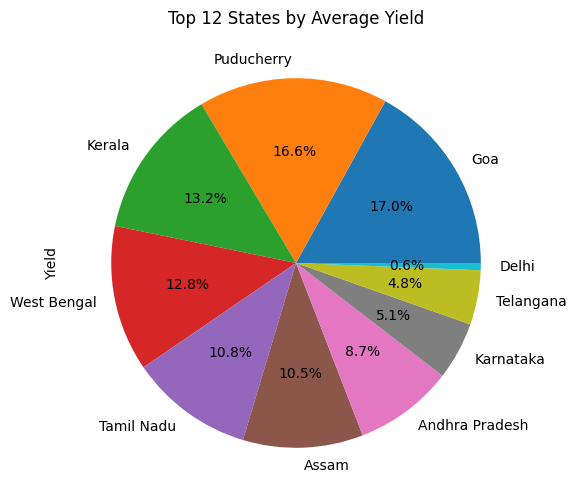

In [222]:
plt.figure(figsize=(6,6))
df.groupby('State')['Yield'].mean().nlargest(10).plot.pie(autopct='%1.1f%%')
plt.title("Top 12 States by Average Yield")
plt.show()

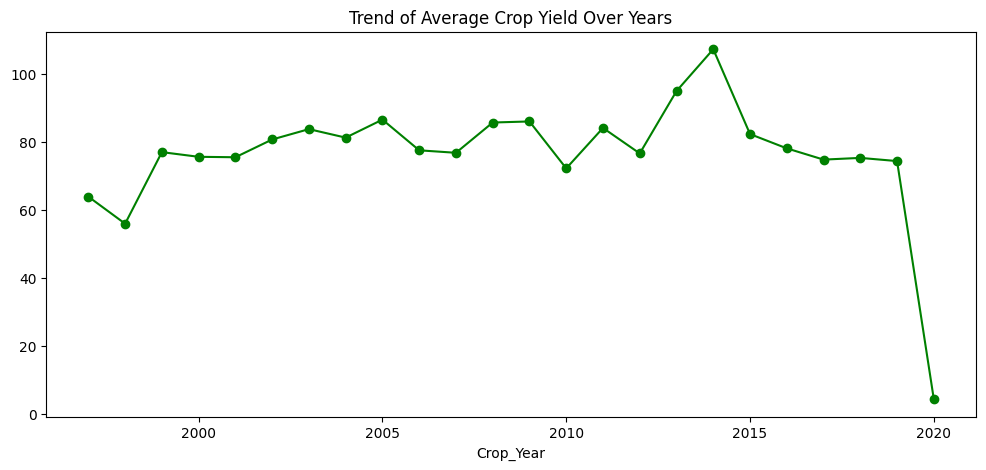

In [223]:
plt.figure(figsize=(12,5))
df.groupby('Crop_Year')['Yield'].mean().plot.line(color='g', marker='o')
plt.title("Trend of Average Crop Yield Over Years")
plt.show()


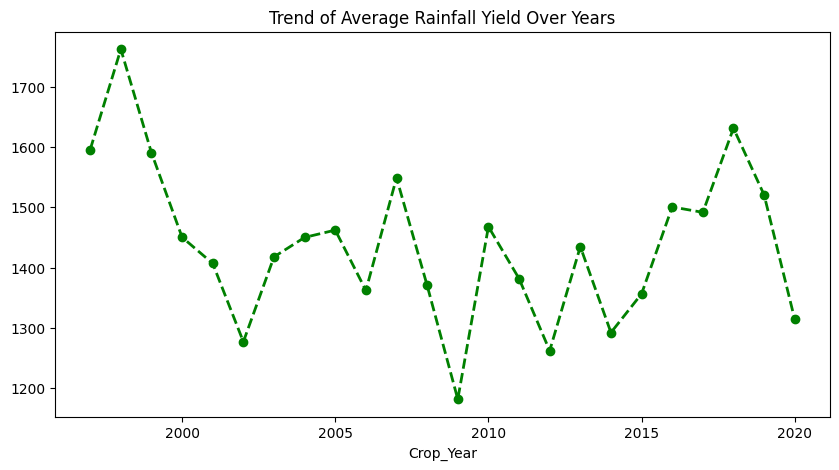

In [224]:
plt.figure(figsize=(10,5))
df.groupby('Crop_Year')['Annual_Rainfall'].mean().plot.line(color='g',linewidth=2, linestyle='--', marker='o')
plt.title("Trend of Average Rainfall Yield Over Years")
plt.show()

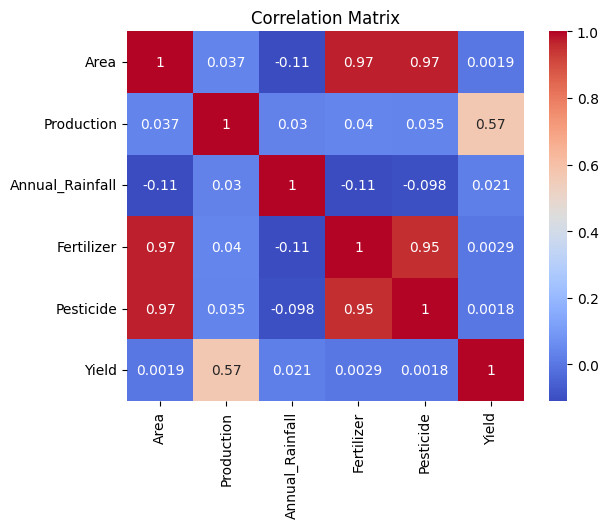

In [225]:
# Heatmap for correlation matrix
corr = df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Checking the Outliers for the numerical columns

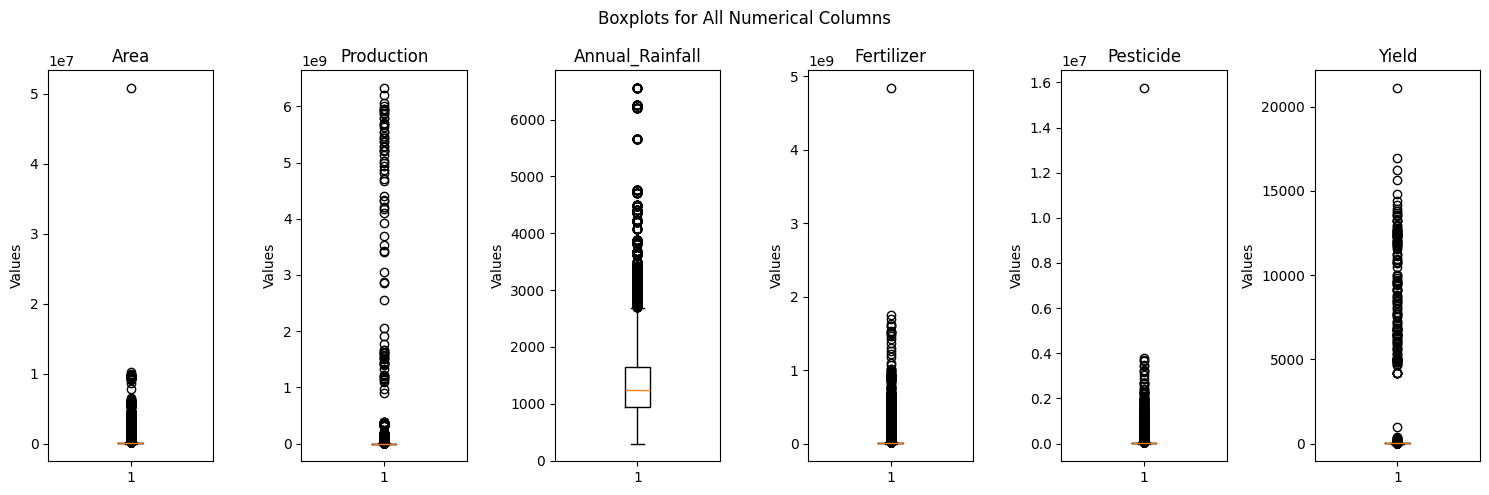

In [226]:
numerical_columns = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

for i, col in enumerate(numerical_columns):
    axes[i].boxplot(df[col].dropna())  # Drop NaN values
    axes[i].set_title(col)
    axes[i].set_ylabel('Values')

plt.suptitle('Boxplots for All Numerical Columns')
plt.tight_layout()
plt.show()

### Handling with the outliers with the Log function

In [227]:
numerical_columns = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

df[numerical_columns] = df[numerical_columns].apply(lambda x: np.log1p(x))

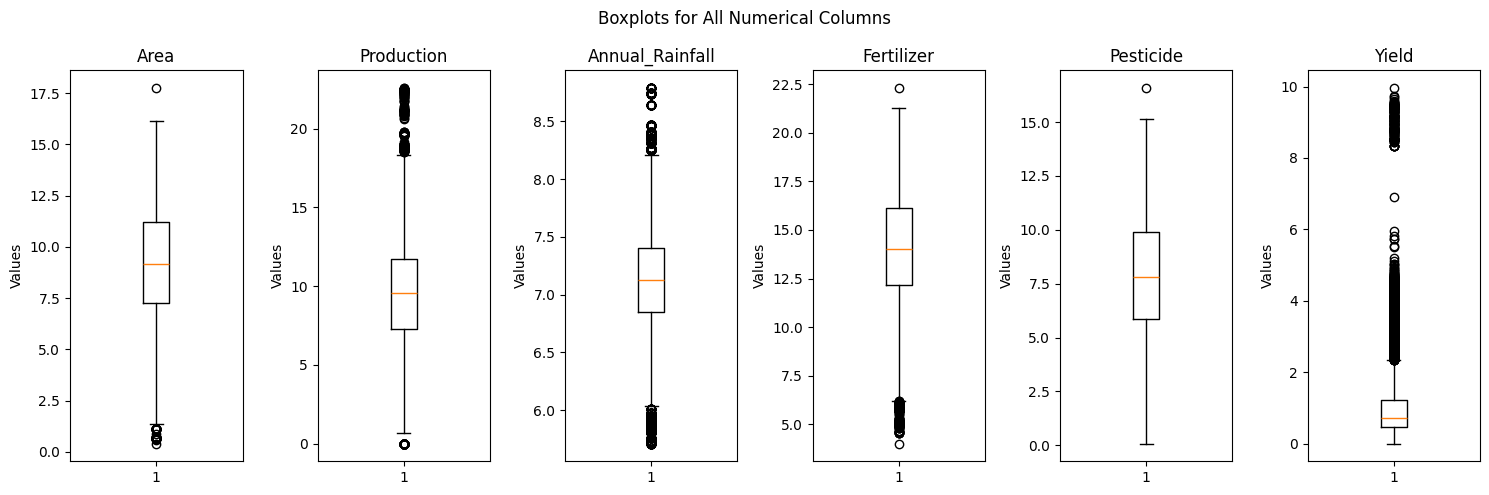

In [228]:
numerical_columns = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

for i, col in enumerate(numerical_columns):
    axes[i].boxplot(df[col].dropna())  # Drop NaN values
    axes[i].set_title(col)
    axes[i].set_ylabel('Values')

plt.suptitle('Boxplots for All Numerical Columns')
plt.tight_layout()
plt.show()

### Label Encoding & StandardScaler Processing

In [229]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [230]:
lc = LabelEncoder()
for col in ['Crop','Season','State']:
    df[col] = lc.fit_transform(df[col])


In [231]:
scaler = StandardScaler()
for col in ['Crop_Year','Area','Production','Annual_Rainfall','Fertilizer','Pesticide','Yield']:
   df[[col]] = scaler.fit_transform(df[[col]])


### Spliting the Data into Train and Test data

In [232]:
x = df.drop(columns=['Yield','Index'])
x.shape

(19689, 9)

In [233]:
y = df[['Yield']]
y.shape

(19689, 1)

In [234]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 42)

## Model Selection & Implementation

### For Crop Yield Prediction  i used the 4 modules i.e
#### 1) Linear Regression
#### 2) Random Forest Regression
#### 3) KNN
#### 4) Decision Tree Regression

In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [236]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
]

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = model.score(x_train, y_train) * 100
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc = model.score(x_test, y_test) * 100
    print(f'The accuracy of the {name} Model Test is {acc:.2f}')

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy', 'R2_score'], color='green') \
    .highlight_min(subset=['MSE'], color='green') \
    .highlight_max(subset=['MSE'], color='red') \
    .highlight_min(subset=['Accuracy', 'R2_score'], color='red')

display(df_styled_best)

The accuracy of the Linear Regression Model Train is 89.58
The accuracy of the Linear Regression Model Test is 90.20


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The accuracy of the Random Forest Model Train is 99.82
The accuracy of the Random Forest Model Test is 98.84
The accuracy of the KNN Model Train is 97.11
The accuracy of the KNN Model Test is 93.64
The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the Decision Tree Model Test is 97.86


,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.902047,0.092283,0.902047
1,Random Forest,0.988389,0.010939,0.988389
2,KNN,0.936423,0.059897,0.936423
3,Decision Tree,0.978638,0.020125,0.978638


In [237]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
          ]

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))

    print(name)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True)
    scores = cross_val_score(model, x, y, cv=kf)

    for fold, score in enumerate(scores):
        print(f"Fold {fold+1}: {score}")

    mean_score = np.mean(scores)
    print(f"Mean Score: {mean_score}")
    print('-'*30)


df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])
df_styled_best = df.style.highlight_max(subset=['Accuracy','R2_score'], color='lightblue').highlight_min(subset=['MSE','MAE','MAPE'], color='lightblue').highlight_max(subset=['MSE','MAE','MAPE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)

Linear Regression
Fold 1: 0.911718351786644
Fold 2: 0.8867602949207345
Fold 3: 0.8998762088715534
Fold 4: 0.8883083714425679
Fold 5: 0.8985377047122887
Mean Score: 0.8970401863467578
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Fold 1: 0.9905069472877992
Fold 2: 0.992361704410907
Fold 3: 0.983053875759989
Fold 4: 0.9889070705916679
Fold 5: 0.9878144337358016
Mean Score: 0.9885288063572328
------------------------------
KNN
Fold 1: 0.9557869538960199
Fold 2: 0.9448789422343989
Fold 3: 0.9531701505027679
Fold 4: 0.9297291771561912
Fold 5: 0.9620235902603774
Mean Score: 0.9491177628099511
------------------------------
Decision Tree
Fold 1: 0.9779499347636184
Fold 2: 0.9727326430156991
Fold 3: 0.9758758211370946
Fold 4: 0.9843222875362271
Fold 5: 0.9704311690251176
Mean Score: 0.9762623710955513
------------------------------


,Model,Accuracy,MSE,MAE,MAPE,R2_score
0,Linear Regression,0.902047,0.092283,0.177508,1.659074,0.902047
1,Random Forest,0.988389,0.010939,0.052563,0.609696,0.988389
2,KNN,0.936423,0.059897,0.103817,1.119355,0.936423
3,Decision Tree,0.978638,0.020125,0.077127,1.048654,0.978638
